In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import random

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
Y = boston.target

In [3]:
X.shape

(506, 13)

In [4]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [5]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(X)
X_transform

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [6]:
index=np.random.choice(506, 101, replace=False)
X_transform[index]

array([[-0.4103848 , -0.48772236,  0.24705682, ...,  0.1130321 ,
         0.33206621, -0.33404299],
       [ 0.75046496, -0.48772236,  1.01599907, ...,  0.80657583,
        -3.01897063,  0.98639405],
       [ 0.01878921, -0.48772236,  1.01599907, ...,  0.80657583,
        -3.66937637,  0.63035264],
       ...,
       [ 0.68661446, -0.48772236,  1.01599907, ...,  0.80657583,
        -3.83745999,  0.84902374],
       [-0.39982277, -0.48772236, -0.21109853, ...,  0.34421334,
         0.42866221,  0.34299638],
       [-0.40427171, -0.48772236, -0.37597609, ...,  1.13022958,
         0.39489198, -0.045285  ]])

## mini_batch_GD for linear regression

In [50]:
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept)
    return np.array(y_lst)
    

# linear loss
def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/X.shape[0])*s

#derivative of loss w.r.t weight
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/X.shape[0])*s
    

# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/X.shape[0]) * s

   
        
        
# gradient function
def mini_batch_gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 1000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.01
    n_iter=[]
    count=1
    batch_size=32
    for i in tqdm(range(epoch)):
        
        for j in range(int(n/batch_size)):
            random_index=np.random.choice(x.shape[0],batch_size,replace=False) #batch size of 32
            x_sample = x[random_index]
            y_sample = y[random_index]
            y_predicted = predicted_y(weight_vector,x_sample,intercept)
            # updation of weight and bias for every records
            weight_vector = weight_vector - learning_rate *dldw(x_sample,y_sample,y_predicted) 
            intercept = intercept - learning_rate * dldb(y_sample,y_predicted)
            
            #appending loss after every 100 iteration
            if j%100==0:
                linear_loss.append(loss(y_sample,y_predicted)) 
                n_iter.append(count)
                count+=1
        
        
    plt.plot(n_iter,linear_loss)
    plt.xlabel("number of iteration")
    plt.ylabel("loss")
    
    return weight_vector,intercept
    
    

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 103.33it/s]


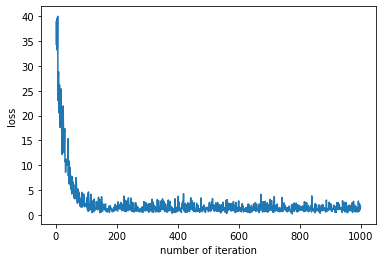

In [51]:
w,b=mini_batch_gradient_descent(X_transform,Y)


In [52]:
print("weight:",w)
print("bias:",b)

weight: [-0.83564811  0.97783327 -0.20133278  0.73897136 -1.95994184  2.70342484
  0.00449527 -3.06834235  1.87580971 -1.21115826 -2.01645776  0.84395181
 -3.75301638]
bias: 22.49746357565466


# predict


In [53]:
def predict(inp):
    y_lst=[]
    for i in range(len(inp)):
        y_lst.append(w@inp[i]+b)
    return np.array(y_lst)

In [54]:
y_pred=predict(X_transform)
y_pred

array([30.46943539, 24.9548622 , 30.54511181, 28.66501722, 28.00034729,
       25.28078809, 22.90794696, 19.43138135, 11.38381416, 18.82855309,
       18.91050745, 21.49457121, 20.81641718, 19.69785084, 19.41673114,
       19.43669702, 20.69299502, 17.03364781, 16.30404641, 18.51969611,
       12.60936664, 17.78558121, 15.9502604 , 13.90355355, 15.79069066,
       13.49692061, 15.58066278, 14.83572638, 19.68947352, 21.03009162,
       11.5536625 , 18.18261129,  8.92525668, 14.37865911, 13.82639576,
       23.72984231, 22.25644505, 23.04599016, 22.86090451, 31.14709615,
       34.02875457, 27.88083879, 25.03616772, 24.44129478, 22.74637707,
       21.87747515, 20.2035659 , 17.80383443,  8.82965593, 16.97790715,
       20.99262048, 23.68532528, 27.4131314 , 23.78061546, 16.23203369,
       30.70043567, 25.12671778, 32.67833541, 21.45719158, 20.72909547,
       17.4992961 , 18.12532582, 23.65095763, 22.25276119, 23.36915869,
       30.39386689, 25.52770164, 21.39373872, 17.67610832, 21.05

In [55]:
df_pred=pd.DataFrame()
df_pred["y_actual"]=Y
df_pred["y_predicted"]=np.round(y_pred,1)
df_pred

,y_actual,y_predicted
0,24.0,30.5
1,21.6,25.0
2,34.7,30.5
3,33.4,28.7
4,36.2,28.0
...,...,...
501,22.4,23.6
502,20.6,22.4
503,23.9,27.7
504,22.0,26.2


# sklearn

In [31]:
from sklearn.linear_model import SGDRegressor
model=SGDRegressor(alpha=0,learning_rate="constant",eta0=0.001)
model.fit(X_transform,Y)

SGDRegressor(alpha=0, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [32]:
model.intercept_

array([22.53049421])

In [33]:
model.coef_

array([-0.81589739,  0.91268359, -0.16276166,  0.71300785, -1.81615915,
        2.75186925, -0.04546646, -2.97644044,  1.80125191, -1.16941354,
       -1.98864102,  0.85320111, -3.6691723 ])

In [56]:
w

array([-0.83564811,  0.97783327, -0.20133278,  0.73897136, -1.95994184,
        2.70342484,  0.00449527, -3.06834235,  1.87580971, -1.21115826,
       -2.01645776,  0.84395181, -3.75301638])

In [57]:
b

22.49746357565466